# Main de Pipelines Project

In [264]:
# imports


from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [265]:
raw = pd.read_csv('Consumo_cerveja.csv', decimal=",")
raw.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [266]:
raw.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [251]:
raw = raw[:365]
raw.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
364,2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446


In [252]:
raw.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [253]:
data = raw

In [254]:
data = data.rename(columns={'Data':'Day', 'Temperatura Maxima (C)': 'Max Temp', 'Temperatura Minima (C)': 'Min Temp', 'Temperatura Media (C)':'Mid Temp', 'Precipitacao (mm)':'Rainfall', 'Final de Semana':'Weekend', 'Consumo de cerveja (litros)':'Consumption'})
data.head()

,Day,Mid Temp,Min Temp,Max Temp,Rainfall,Weekend,Consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [255]:
raw['Data'] = pd.to_datetime(raw['Data'])
data['Day Of Week'] = raw['Data'].dt.weekday_name
data.head(10)

,Day,Mid Temp,Min Temp,Max Temp,Rainfall,Weekend,Consumption,Day Of Week
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218,Tuesday
6,2015-01-07,24.00,19.5,33.7,0.0,0.0,29.732,Wednesday
7,2015-01-08,24.90,19.5,32.8,48.6,0.0,28.397,Thursday
8,2015-01-09,28.20,21.9,34.0,4.4,0.0,24.886,Friday
9,2015-01-10,26.76,22.1,34.2,0.0,1.0,37.937,Saturday


In [256]:
data['Day'] = data['Day'].apply(lambda s: s.split('-'))
data[['Year','Month','Day']] = pd.DataFrame(data.Day.values.tolist(), index=data.index)
data

,Day,Mid Temp,Min Temp,Max Temp,Rainfall,Weekend,Consumption,Day Of Week,Year,Month
0,01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,2015,01
1,02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,2015,01
2,03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,2015,01
3,04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,2015,01
4,05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,2015,01
5,06,23.78,20.1,30.5,12.2,0.0,28.218,Tuesday,2015,01
6,07,24.00,19.5,33.7,0.0,0.0,29.732,Wednesday,2015,01
7,08,24.90,19.5,32.8,48.6,0.0,28.397,Thursday,2015,01
8,09,28.20,21.9,34.0,4.4,0.0,24.886,Friday,2015,01
9,10,26.76,22.1,34.2,0.0,1.0,37.937,Saturday,2015,01


In [257]:
column_order = ['Year','Month','Day','Day Of Week','Min Temp','Mid Temp','Max Temp','Rainfall','Weekend','Consumption']
data = data[column_order]
data.head()

,Year,Month,Day,Day Of Week,Min Temp,Mid Temp,Max Temp,Rainfall,Weekend,Consumption
0,2015,01,01,Thursday,23.9,27.30,32.5,0.0,0.0,25.461
1,2015,01,02,Friday,24.5,27.02,33.5,0.0,0.0,28.972
2,2015,01,03,Saturday,22.4,24.82,29.9,0.0,1.0,30.814
3,2015,01,04,Sunday,21.5,23.98,28.6,1.2,1.0,29.799
4,2015,01,05,Monday,21.0,23.82,28.3,0.0,0.0,28.900


In [258]:
data = data.drop(['Year'], axis=1)
data.head()

,Month,Day,Day Of Week,Min Temp,Mid Temp,Max Temp,Rainfall,Weekend,Consumption
0,01,01,Thursday,23.9,27.30,32.5,0.0,0.0,25.461
1,01,02,Friday,24.5,27.02,33.5,0.0,0.0,28.972
2,01,03,Saturday,22.4,24.82,29.9,0.0,1.0,30.814
3,01,04,Sunday,21.5,23.98,28.6,1.2,1.0,29.799
4,01,05,Monday,21.0,23.82,28.3,0.0,0.0,28.900


In [259]:
data['Month'] = data['Month'].astype('int')
data['Consumption'] = data['Consumption'].astype('float64')
data['Consumption'] = data['Consumption'].apply(lambda x: x*1000)

In [260]:
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data.head()

,Month,Day,Day Of Week,Min Temp,Mid Temp,Max Temp,Rainfall,Weekend,Consumption
0,Jan,01,Thursday,23.9,27.30,32.5,0.0,0.0,25461.0
1,Jan,02,Friday,24.5,27.02,33.5,0.0,0.0,28972.0
2,Jan,03,Saturday,22.4,24.82,29.9,0.0,1.0,30814.0
3,Jan,04,Sunday,21.5,23.98,28.6,1.2,1.0,29799.0
4,Jan,05,Monday,21.0,23.82,28.3,0.0,0.0,28900.0


In [261]:
cons_month = data.groupby('Month', as_index=False).agg({'Mid Temp':'mean','Rainfall':'mean','Consumption':'mean'}).sort_values(by=('Consumption'), ascending=False)
cons_month

,Month,Mid Temp,Rainfall,Consumption
4,Jan,25.218065,5.038710,28677.645161
10,Oct,21.905806,2.970968,27653.193548
2,Dec,23.519355,10.261290,27169.516129
1,Aug,19.900000,1.019355,25908.967742
9,Nov,22.194000,8.240000,25828.200000
3,Feb,23.555000,9.750000,25673.142857
11,Sep,21.000667,6.723333,25198.133333
7,Mar,22.167097,10.732258,25036.387097
0,Apr,20.837333,3.603333,24624.100000
6,Jun,18.070000,0.676667,23627.066667


In [262]:
cons_day = data.groupby('Day Of Week', as_index=False).agg({'Mid Temp':'mean','Rainfall':'mean','Consumption':'mean'}).sort_values(by=('Consumption'), ascending=False)
cons_day

,Day Of Week,Mid Temp,Rainfall,Consumption
3,Sunday,20.931154,4.076923,29007.519231
2,Saturday,21.010385,6.378846,28837.923077
5,Tuesday,21.220000,5.805769,24355.153846
0,Friday,21.373077,4.221154,24137.884615
4,Thursday,21.598868,4.552830,24076.547170
6,Wednesday,21.376538,2.730769,23810.384615
1,Monday,21.067308,8.623077,23609.634615


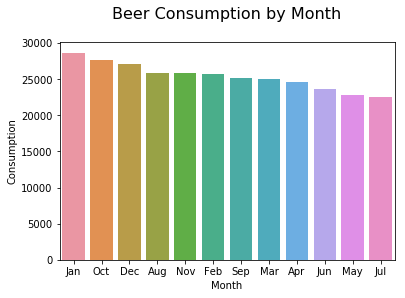

In [263]:
title1 = 'Beer Consumption by Month'
barchart_month = sns.barplot(data=cons_month, x='Month', y='Consumption')
plt.title(title1 + "\n", fontsize=16)
fig = barchart_month.get_figure()
fig.savefig(title1 + '.png')

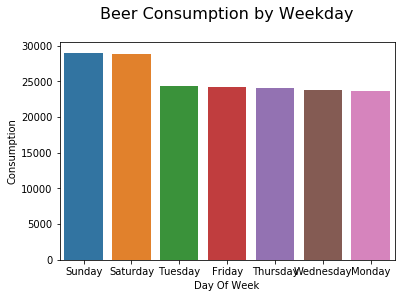

In [244]:
title2 = 'Beer Consumption by Weekday'
barchart_day = sns.barplot(data=cons_day, x='Day Of Week', y='Consumption')
plt.title(title2 + "\n", fontsize=16)
fig = barchart_day.get_figure()
fig.savefig(title2 + '.png')